<a href="https://colab.research.google.com/github/rahul-727/Reinforcement-Learning-/blob/main/2348544_Lab1_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Define the Problem
We have four ad slots:

Top Banner
Sidebar
Footer
Pop-up
The goal is to maximize the number of clicks. We do not know the click-through rates (CTRs) of each slot initially, so we need to explore each option while also exploiting the best-performing slot.

Step 2: Set Up the Epsilon-Greedy Algorithm
We will use the epsilon-greedy strategy:

Exploit (90% of the time): Choose the ad slot with the highest estimated CTR.
Explore (10% of the time): Randomly choose any ad slot.
We'll simulate the clicks based on some unknown true CTRs for each slot, which will be randomly generated for our experiment.

Step 3: Run the Simulation
For each impression:

Select an ad slot using the epsilon-greedy algorithm.
Simulate showing the ad and record whether the user clicked on it.
Update the estimated CTR for that slot based on the observed outcome.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the problem

In [20]:
class MultiArmedBanditEpsilonGreedy:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms  # Number of arms (ad slots)
        self.epsilon = epsilon  # Exploration rate (10% exploration)
        # True click-through rates for each ad slot (unknown to the agent)
        self.true_ctrs = np.random.rand(n_arms)
        # Estimated click-through rates (what the agent learns over time)
        self.estimates = np.zeros(n_arms)
        # Number of times each ad slot has been selected
        self.counts = np.zeros(n_arms)
        self.total_clicks = 0  # Total clicks observed

    def select_arm(self):
        """Select an arm (ad slot) using the epsilon-greedy strategy."""
        if np.random.rand() < self.epsilon:
            # Explore: randomly select an arm
            return np.random.randint(self.n_arms)
        else:
            # Exploit: select the arm with the highest estimated CTR
            return np.argmax(self.estimates)

    def pull_arm(self, arm):
        """Simulate pulling an arm (showing an ad). Returns 1 for a click, 0 for no click."""
        return 1 if np.random.rand() < self.true_ctrs[arm] else 0

    def update_estimates(self, arm, reward):
        """Update the estimated CTR for the selected arm."""
        self.counts[arm] += 1
        self.total_clicks += reward
        # Update the estimate using the running average formula
        self.estimates[arm] += (reward - self.estimates[arm]) / self.counts[arm]

# Simulation of the Epsilon-greedy algorithm


In [21]:
def epsilon_greedy_strategy(bandit, n_rounds):
    total_reward = 0
    rewards = []
    arm_pulls = np.zeros(bandit.n_arms)

    for _ in range(n_rounds):
        # Select an arm (ad slot)
        arm = bandit.select_arm()
        # Pull the arm (show the ad) and observe the result (click or no click)
        reward = bandit.pull_arm(arm)
        # Update the estimated CTR for the selected arm
        bandit.update_estimates(arm, reward)
        # Update total reward and arm pull counts
        total_reward += reward
        rewards.append(total_reward)
        arm_pulls[arm] += 1

    return rewards, arm_pulls

# Run Simulation

In [22]:
n_arms = 4  # Four ad slots
n_rounds = 1000  # Simulate 1000 impressions (rounds)

bandit = MultiArmedBanditEpsilonGreedy(n_arms, epsilon=0.1)
rewards, arm_pulls = epsilon_greedy_strategy(bandit, n_rounds)

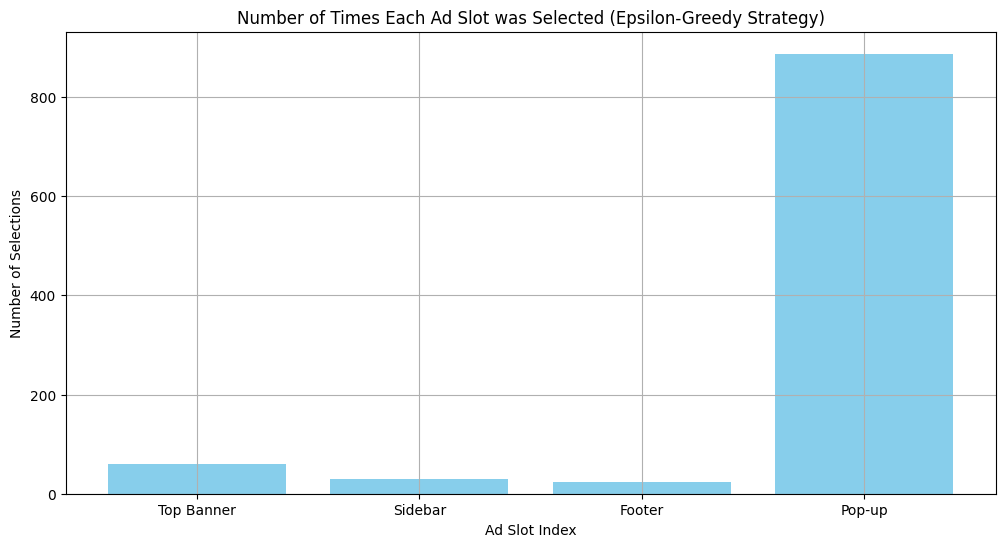

In [24]:
# Plot the number of times each ad slot was selected
plt.figure(figsize=(12, 6))
plt.bar(range(n_arms), arm_pulls, color='skyblue')
plt.xlabel('Ad Slot Index')
plt.ylabel('Number of Selections')
plt.title('Number of Times Each Ad Slot was Selected (Epsilon-Greedy Strategy)')
plt.xticks(range(n_arms), ['Top Banner', 'Sidebar', 'Footer', 'Pop-up'])
plt.grid(True)
plt.show()

In [25]:
# Print the true CTRs and learned CTRs for comparison
print("True CTRs: ", bandit.true_ctrs)
print("Estimated CTRs: ", bandit.estimates)

True CTRs:  [0.70500222 0.59491641 0.15408351 0.76429795]
Estimated CTRs:  [0.68333333 0.53333333 0.17391304 0.75760992]


True CTRs: [0.70500222, 0.59491641, 0.15408351, 0.76429795]
These are the real (but hidden) probabilities that a user will click on an ad in each slot.

Estimated CTRs: [0.68333333, 0.53333333, 0.17391304, 0.75760992]
These are the probabilities that the algorithm has learned based on its observations.

Slot 4 (Pop-up):
True CTR: 0.764
Estimated CTR: 0.757
The algorithm did a good job of accurately estimating the highest-performing slot, showing effective exploitation over time.

Slot 1 (Top Banner):
True CTR: 0.705
Estimated CTR: 0.683
This is also quite close to the true CTR, showing that the algorithm explored enough to capture its potential.

Slot 2 (Sidebar):
True CTR: 0.594
Estimated CTR: 0.533
This is slightly underestimated, but still reasonable. The algorithm likely explored this option but prioritized slots with higher initial performance.

Slot 3 (Footer):
True CTR: 0.154
Estimated CTR: 0.173
The algorithm correctly identified this as a low-performing slot and did not prioritize it often, leading to accurate estimation.